In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
from importlib import reload
%matplotlib inline

import moving_average as ma
import macd
import utility

/home/ryohayama/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
data = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2017.csv', sep=';', header=None)
data.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
data = data.set_index('time')
del data['volume']

In [3]:
aggDay= utility.aggregate_periods(data, period=1440)
print(len(aggDay))

258


In [4]:
reload(macd)
MACD = macd.MACD(aggDay['close'])

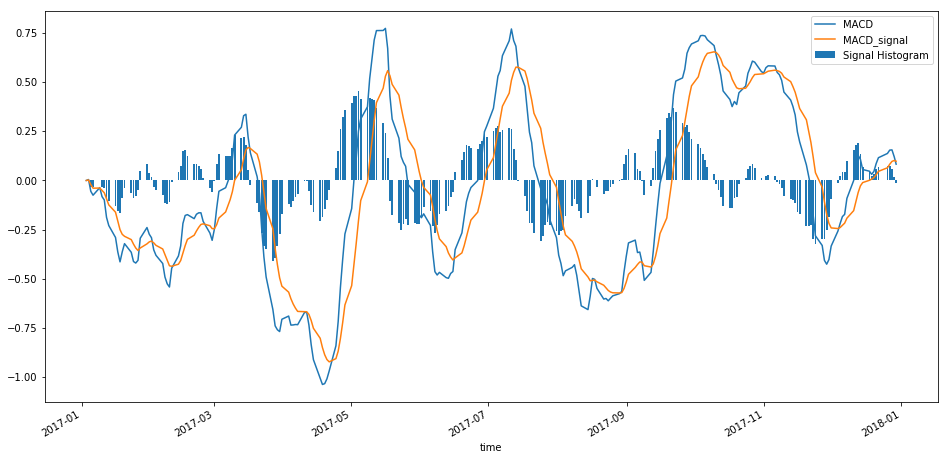

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
MACD.data[['MACD', 'MACD_signal']].plot(ax=ax)
ax.bar(MACD.data.index, MACD.data['MACD_histogram'], label='Signal Histogram')#, width=0.0001, linewidth=0.1, fill=False)
ax.legend()